In [2]:
%run start.py

In [3]:
## 1. data/Online_Retail.xlsx  불러오기

In [4]:
retail_df = pd.read_excel('data/Online_Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [5]:
## 2. retail_df 의 데이터 정보 확인

In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
## 3. retail_df 변수에 'Quantity' 항목이 0보다 큰 값만

In [25]:
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df.count()

InvoiceNo      531285
StockCode      531285
Description    530693
Quantity       531285
InvoiceDate    531285
UnitPrice      531285
CustomerID     397924
Country        531285
dtype: int64

In [27]:
## 4. retail_df 변수에 'UnitPrice' 항목이 0보다 큰 값만 

retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df.count()

InvoiceNo      530104
StockCode      530104
Description    530104
Quantity       530104
InvoiceDate    530104
UnitPrice      530104
CustomerID     397884
Country        530104
dtype: int64

In [33]:
## 5. retail_df 변수에 'CustomerID'항목이 널값이 아닌 것만 
retail_df = retail_df[retail_df['CustomerID'].notnull()]
retail_df.count()

InvoiceNo      397884
StockCode      397884
Description    397884
Quantity       397884
InvoiceDate    397884
UnitPrice      397884
CustomerID     397884
Country        397884
dtype: int64

In [35]:
## 6. 'CustomerID' 자료형을 정수형으로 변환
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [39]:
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [41]:
## 7. 중복 레코드 제거

retail_df.drop_duplicates(inplace=True)
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int32         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.5+ MB


In [43]:
## 8. 주문금액 컬럼 추가
retail_df['SaleAmount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [45]:
## 9. 'CustomerID'항목을 기준으로 aggregations 실행
aggregations = {    
    'InvoiceNo':'count',
    'SaleAmount':'sum',
    'InvoiceDate':'max'
}


In [47]:
customer_df = retail_df.groupby('CustomerID').agg(aggregations)
customer_df

,InvoiceNo,SaleAmount,InvoiceDate
CustomerID,,,
12346,1,77183.60,2011-01-18 10:01:00
12347,182,4310.00,2011-12-07 15:52:00
12348,31,1797.24,2011-09-25 13:13:00
12349,73,1757.55,2011-11-21 09:51:00
12350,17,334.40,2011-02-02 16:01:00
...,...,...,...
18280,10,180.60,2011-03-07 09:52:00
18281,7,80.82,2011-06-12 10:53:00
18282,12,178.05,2011-12-02 11:43:00


In [49]:
## 10. 인덱스 값 리셋
customer_df =customer_df.reset_index()
customer_df.head()

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [51]:
## 11. 컬럼이름 변경 
customer_df = customer_df.rename(columns = {'InvoiceNo':'Freq','InvoiceDate':'ElapsedDays'})
customer_df.head(3)


,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00


In [53]:
## 12. 날짜 계산
customer_df['ElapsedDays'] = datetime.datetime(2011,12,10) - customer_df['ElapsedDays']
customer_df.head(3)

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,325 days 13:59:00
1,12347,182,4310.00,2 days 08:08:00
2,12348,31,1797.24,75 days 10:47:00


In [57]:
## 13. '일' 단위로 
customer_df['ElapsedDays'] = customer_df['ElapsedDays'].apply(lambda x: x.days+1)
customer_df.head(3)

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,326
1,12347,182,4310.00,3
2,12348,31,1797.24,76


### 분포 확인

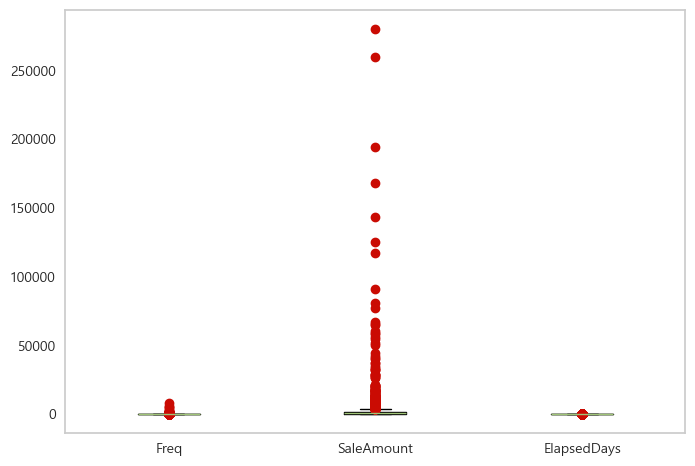

In [61]:
## 14. 박스플롯 그기기
plt.boxplot([customer_df['Freq'],customer_df['SaleAmount'],customer_df['ElapsedDays']],sym='ro')
plt.xticks([1,2,3],['Freq','SaleAmount','ElapsedDays'])
plt.grid(False)
plt.show()


#### 데이터 값의 왜곡(치우침)을 줄이기 위한 작업 : 로그 함수로 분포 조정

In [63]:
# 15. 로그함수 이용하여 분포 조정

customer_df['Freq_log'] = np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log'] = np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDays_log'] = np.log1p(customer_df['ElapsedDays'])

customer_df.head()

## log1p(x)  :  값이 아주 작은 값일 때 사용, 입력값에 1을 더한 후 자연로그 계산하여 조정
## 데이터 분포를 정규화하고, 모델의 성능을 높이는 데 자주 사용

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log
0,12346,1,77183.60,326,0.693147,11.253955,5.789960
1,12347,182,4310.00,3,5.209486,8.368925,1.386294
2,12348,31,1797.24,76,3.465736,7.494564,4.343805
3,12349,73,1757.55,19,4.304065,7.472245,2.995732
4,12350,17,334.40,311,2.890372,5.815324,5.743003


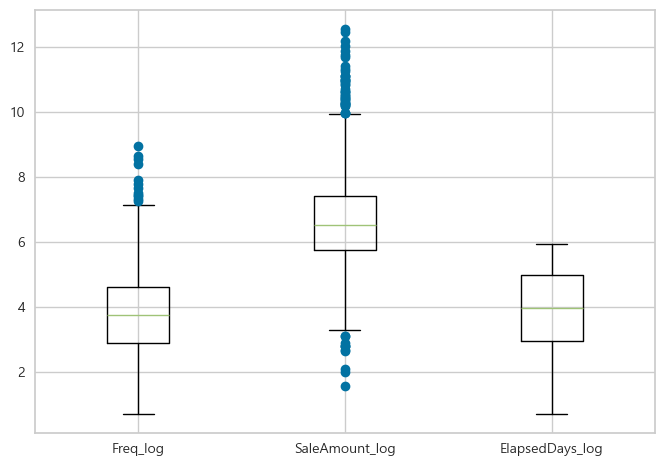

In [71]:
## 16. 박스플롯 확인
plt.boxplot([customer_df['Freq_log'],customer_df['SaleAmount_log'],customer_df['ElapsedDays_log']],sym='bo')
plt.xticks([1,2,3],['Freq_log','SaleAmount_log','ElapsedDays_log'])
plt.show()



#### 모델 구축과 실행

In [73]:
## 17. 항목 선택
X_features = customer_df[['Freq_log', 'SaleAmount_log', 'ElapsedDays_log']].values
X_features



array([[ 0.69314718, 11.25395523,  5.78996017],
       [ 5.20948615,  8.36892517,  1.38629436],
       [ 3.4657359 ,  7.49456369,  4.34380542],
       ...,
       [ 2.56494936,  5.1876651 ,  2.19722458],
       [ 6.58202514,  7.62390095,  1.60943791],
       [ 4.26267988,  7.51658563,  3.78418963]])

In [75]:
## 18. 표준화
X_features_scaled = StandardScaler().fit_transform(X_features)
X_features_scaled


array([[-2.43820181,  3.7077163 ,  1.47888429],
       [ 1.18898578,  1.41490344, -1.89064214],
       [-0.21146474,  0.72002428,  0.37233877],
       ...,
       [-0.9349095 , -1.11333158, -1.27014755],
       [ 2.29130702,  0.82281217, -1.71990073],
       [ 0.42858139,  0.73752572, -0.05585907]])

### 최적의 K찾기 

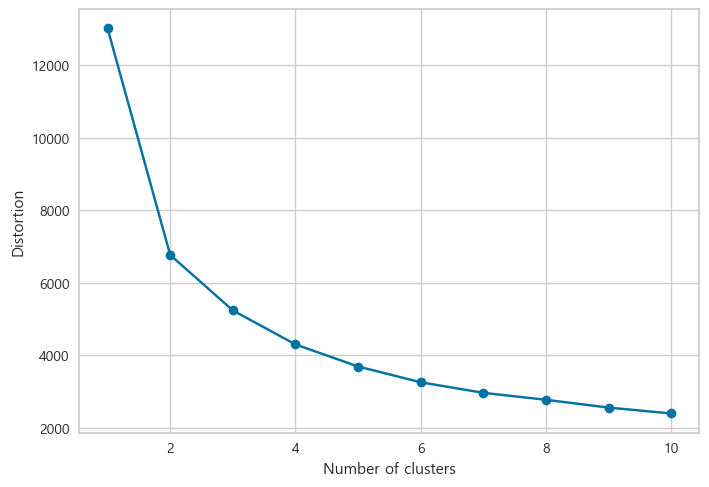

In [77]:
## 19. 엘보우 그래프로 최적의 K값 찾기

d = []

for i in range(1, 11):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모델 생성
    kmeans_i.fit(X_features_scaled)   # 모델 훈련
    d.append(kmeans_i.inertia_)    ## 클러스터 내 응집도, 중심점에서 데이터까지의 거리 제곱합, 값이 작을수록 데이터에 잘 맞는 분석
    
plt.plot(range(1,11), d, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


In [79]:
## 20. KMeans 모델구축
kmeans = KMeans(n_clusters=4)



## 21. 모델 학습 
Y_labels = kmeans.fit_predict(X_features_scaled) 
Y_labels



array([0, 2, 0, ..., 1, 2, 0])

In [81]:
## 22. 그룹 확인
customer_df['ClusterLabel'] = Y_labels
customer_df.head(3)

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,0
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,2
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,0
